### <p style="color:orange" align="center">Convolutional Neural Network</p>

Image Classification using CNN (mnist dataset)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

2022-10-26 18:54:24.678317: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 18:54:28.245325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 18:54:28.245444: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-26 18:54:28.527639: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 18:54:45.177018: W tensorflow/stream_executor/platform/de

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train.shape

(60000, 28, 28)

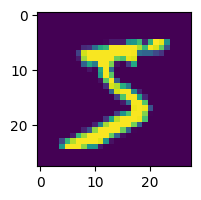

In [8]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[0])

In [6]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
from keras import layers, Sequential

mnistCNN_Model = Sequential([
    layers.Conv2D(filters=28, activation='relu', kernel_size=(3,3), input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(56, activation='relu'),
    layers.Dense(28, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
mnistCNN_Model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
mnistCNN_Model.fit(X_train,y_train, epochs=10)

2022-10-26 19:12:00.181436: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2022-10-26 19:12:07.248752: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18783072 exceeds 10% of free system memory.
2022-10-26 19:12:07.353504: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18783072 exceeds 10% of free system memory.


  15/1875 [..............................] - ETA: 31s - loss: 2.2319 - accuracy: 0.2562

2022-10-26 19:12:07.609618: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18783072 exceeds 10% of free system memory.
2022-10-26 19:12:07.610454: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 18783072 exceeds 10% of free system memory.


1875/1875 [==============================] - 27s 13ms/step - loss: 0.1756 - accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0535 - accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0377 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0177 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0142 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0132 - accuracy: 0.9958
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0091 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 29s 15ms/step - lo

In [13]:
mnistCNN_Model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0333 - accuracy: 0.9908


[0.0333169661462307, 0.9908000230789185]

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = mnistCNN_Model.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [15]:
import pickle
with open("./models/mnistCNN_model.pickle","wb") as f:
     pickle.dump(mnistCNN_Model, f)

INFO:tensorflow:Assets written to: ram://fea385db-a704-4891-88d5-dddcea6191fb/assets


INFO:tensorflow:Assets written to: ram://fea385db-a704-4891-88d5-dddcea6191fb/assets


In [17]:
pickle_in = open("./models/mnistCNN_model.pickle","rb")
model = pickle.load(pickle_in)

In [18]:
y_pred_by_model = model.predict(X_test)
y_pred_by_model_classes = [np.argmax(i) for i in y_pred_by_model]

print(classification_report(y_test,y_pred_by_model_classes))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

